<a href="https://colab.research.google.com/github/hendra136/Business_intellegence/blob/main/Assigment_Day_31_Customer_Lifetime_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Data**

In [ ]:
from google.colab import auth, drive
from oauth2client.client import GoogleCredentials
import pandas as pd
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving file_out.csv to file_out.csv


In [ ]:
# Membaca dataset menjadi dataframe
df = pd.read_csv('file_out.csv')

# EDA

In [ ]:
df.head()

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity
0,0,716,2019-09-23,1039,381.78,67.37254,1,1.0
1,1,716,2019-09-23,853,593.22,0.00034,1,1.0
2,2,716,2019-09-23,862,423.73,-0.00119,1,1.0
3,3,716,2019-09-23,868,201.70,35.58814,1,1.0
4,4,716,2019-09-23,2313,345.76,61.01966,1,1.0


In [ ]:
# Get the size of the dataset
df.shape

(33356, 8)

In [ ]:
# Get list of columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33356 entries, 0 to 33355
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  33356 non-null  int64  
 1   DocumentID  33356 non-null  int64  
 2   Date        33356 non-null  object 
 3   SKU         33356 non-null  int64  
 4   Price       33356 non-null  float64
 5   Discount    33356 non-null  float64
 6   Customer    33356 non-null  int64  
 7   Quantity    33356 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.0+ MB


In [ ]:
# Get summary statistics of the dataset
df.describe()

,Unnamed: 0,DocumentID,SKU,Price,Discount,Customer,Quantity
count,33356.000000,33356.000000,33356.000000,33356.000000,33356.000000,33356.000000,33356.000000
mean,16677.500000,8227.577227,1241.273174,2915.716875,591.249968,307.968581,5.760695
std,9629.192126,4028.047727,893.872164,10285.512325,3508.983569,162.675166,19.550559
min,0.000000,0.000000,0.000000,0.000000,-0.004920,0.000000,0.000000
25%,8338.750000,5399.750000,503.000000,661.016949,95.674576,179.000000,2.000000
50%,16677.500000,8733.000000,1008.000000,1203.389830,195.254237,286.000000,4.000000
75%,25016.250000,10857.000000,2078.250000,2572.194915,423.489661,427.000000,4.000000
max,33355.000000,15751.000000,2904.000000,522767.340000,240396.660000,605.000000,1246.000000


In [ ]:
# Count unique values in each column
for col in df.columns:
  print(col, df[col].nunique())

Unnamed: 0 33356
DocumentID 15752
Date 1165
SKU 2905
Price 8964
Discount 7623
Customer 606
Quantity 115


# Data Preprocessing

In [ ]:
# Check for missing values
df.isnull().sum()

Unnamed: 0    0
DocumentID    0
Date          0
SKU           0
Price         0
Discount      0
Customer      0
Quantity      0
dtype: int64

In [ ]:
# Drop categorical columns except Customer
df_prep = df.drop(['Unnamed: 0', 'DocumentID', 'SKU'], axis=1)

# Rename Customer column
df_prep.rename(columns = {'Customer':'CustomerId'}, inplace=True)

df_prep.head()

,Date,Price,Discount,CustomerId,Quantity
0,2019-09-23,381.78,67.37254,1,1.0
1,2019-09-23,593.22,0.00034,1,1.0
2,2019-09-23,423.73,-0.00119,1,1.0
3,2019-09-23,201.70,35.58814,1,1.0
4,2019-09-23,345.76,61.01966,1,1.0


In [ ]:
# Convert Date column from string to datetime
df_prep['Date'] = pd.to_datetime(df_prep['Date'])
df_prep.head()

,Date,Price,Discount,CustomerId,Quantity
0,2019-09-23,381.78,67.37254,1,1.0
1,2019-09-23,593.22,0.00034,1,1.0
2,2019-09-23,423.73,-0.00119,1,1.0
3,2019-09-23,201.70,35.58814,1,1.0
4,2019-09-23,345.76,61.01966,1,1.0


# Feature Engineering

In [ ]:
# Create a unique dataframe containing the customer id
import numpy as np

df_customer = pd.DataFrame(df_prep['CustomerId'].unique())
df_customer.columns = ['CustomerId']
df_customer.head()

,CustomerId
0,1
1,460
2,479
3,26
4,580


# Calculating the RFM-T



## Tenure

In [ ]:
# Get the first purchase date of each customer
from datetime import datetime, timedelta, date

df_tenure = df_prep.groupby('CustomerId').Date.min().reset_index()
df_tenure.columns = ['CustomerId','MinPurchaseDate']
df_tenure.head()

,CustomerId,MinPurchaseDate
0,0,2022-01-15
1,1,2019-02-18
2,2,2019-06-18
3,3,2022-06-04
4,4,2022-06-25


In [ ]:
df_tenure['Tenure'] = (df_prep['Date'].max() - df_tenure['MinPurchaseDate']).dt.days
df_tenure.head()

,CustomerId,MinPurchaseDate,Tenure
0,0,2022-01-15,298
1,1,2019-02-18,1360
2,2,2019-06-18,1240
3,3,2022-06-04,158
4,4,2022-06-25,137


<Axes: xlabel='Tenure', ylabel='Count'>

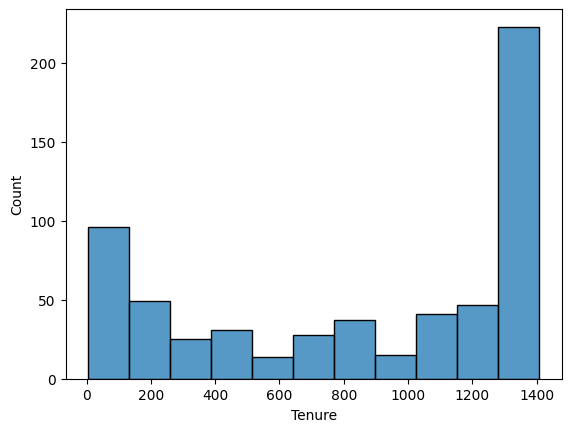

In [ ]:
import seaborn as sns

sns.histplot(data=df_tenure, x='Tenure')

## Recency

In [ ]:
# Get the last purchase date for each customer

df_recency = df_prep.groupby('CustomerId').Date.max().reset_index()
df_recency.columns = ['CustomerId','MaxPurchaseDate']
df_recency.head()

,CustomerId,MaxPurchaseDate
0,0,2022-11-09
1,1,2021-03-20
2,2,2022-09-09
3,3,2022-10-30
4,4,2022-10-27


In [ ]:
# Calculate the days difference from customer's last puschase with the dataset's last purchase

df_recency['Recency'] = (df_recency['MaxPurchaseDate'].max() - df_recency['MaxPurchaseDate']).dt.days
df_recency.head()

,CustomerId,MaxPurchaseDate,Recency
0,0,2022-11-09,0
1,1,2021-03-20,599
2,2,2022-09-09,61
3,3,2022-10-30,10
4,4,2022-10-27,13


<Axes: xlabel='Recency', ylabel='Count'>

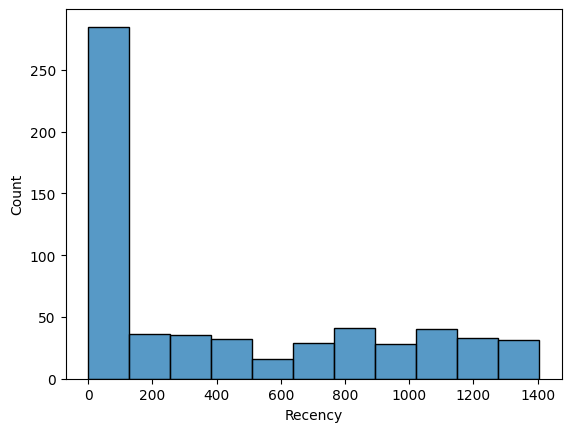

In [ ]:
sns.histplot(data=df_recency, x='Recency')

## Frequency

In [ ]:
# Get the purchase frequency for each customer

df_frequency = df_prep.groupby('CustomerId').Date.count().reset_index()
df_frequency.columns = ['CustomerId','Frequency']
df_frequency.head()

,CustomerId,Frequency
0,0,19
1,1,181
2,2,35
3,3,2
4,4,111


<Axes: xlabel='Frequency', ylabel='Count'>

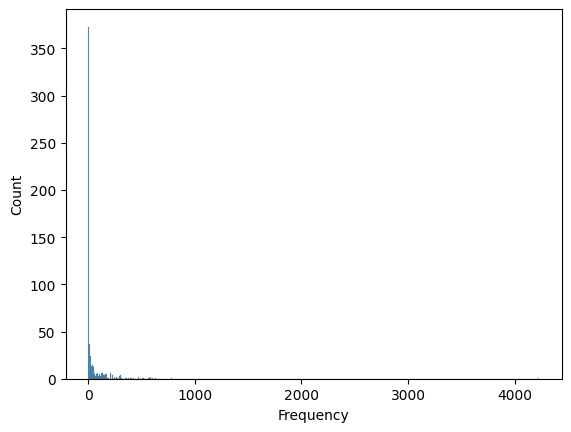

In [ ]:
sns.histplot(data=df_frequency, x='Frequency')

## Monetary

In [ ]:
# Get the total price for each invoice

df_prep['TotalPrice'] = df_prep['Price'] * df_prep['Quantity']
df_prep.head()

,Date,Price,Discount,CustomerId,Quantity,TotalPrice
0,2019-09-23,381.78,67.37254,1,1.0,381.78
1,2019-09-23,593.22,0.00034,1,1.0,593.22
2,2019-09-23,423.73,-0.00119,1,1.0,423.73
3,2019-09-23,201.70,35.58814,1,1.0,201.70
4,2019-09-23,345.76,61.01966,1,1.0,345.76


In [ ]:
# Get the total purchase value for each customer

df_monetary = df_prep.groupby('CustomerId').TotalPrice.sum().reset_index()
df_monetary.columns = ['CustomerId','Monetary']

# Format the float values
pd.options.display.float_format = '{:,.2f}'.format

df_monetary.head()

,CustomerId,Monetary
0,0,"378,305.25"
1,1,"788,089.14"
2,2,"197,170.27"
3,3,"5,261.61"
4,4,"45,117,187.72"


<Axes: xlabel='Monetary', ylabel='Count'>

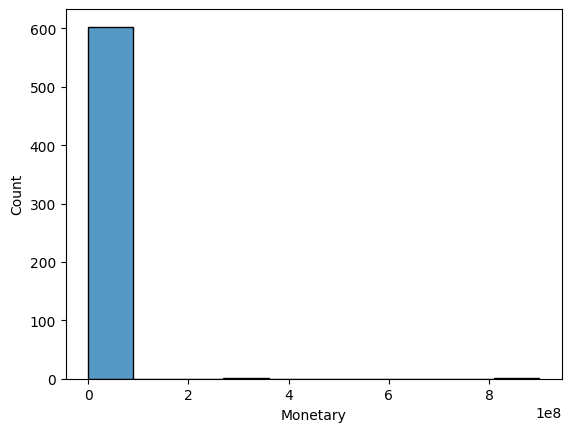

In [ ]:
sns.histplot(data=df_monetary, x='Monetary', bins=10)

## Merging RFM-T Dataframes

In [ ]:
# Stitch RFM metrics
df_customer = pd.merge(df_customer, df_recency, on='CustomerId')
df_customer = pd.merge(df_customer, df_tenure, on='CustomerId')
df_customer = pd.merge(df_customer, df_frequency, on='CustomerId')
df_customer = pd.merge(df_customer, df_monetary, on='CustomerId')

# Drop MaxPurchaseDate column
df_customer = df_customer.drop('MinPurchaseDate', axis=1)
df_customer = df_customer.drop('MaxPurchaseDate', axis=1)
df_customer.head()

,CustomerId,Recency,Tenure,Frequency,Monetary
0,1,599,1360,181,"788,089.14"
1,460,1293,1306,3,"84,891.52"
2,479,1047,1401,42,"60,043.93"
3,26,1259,1259,1,"2,500.00"
4,580,1197,1197,1,"11,016.95"


# Modeling

We are going to predict the purchase frequency of each customers in the next 6 months.
We will use the BG/NBD model using the BetaGeoFitter library.

In [ ]:
!pip install lifetimes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00


In [ ]:
# BG/NBD model works for customers with non-zero variables
df_customer = df_customer[df_customer['Frequency'] > 0]
df_customer = df_customer[df_customer['Recency'] > 0]

In [ ]:
# Train the BG/NBD model
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(df_customer['Frequency'], df_customer['Recency'], df_customer['Tenure'])

<lifetimes.BetaGeoFitter: fitted with 585 subjects, a: 0.43, alpha: 0.02, b: 6.46, r: 0.15>

In [ ]:
# Predict the frequency for each customer in the next 6 months

t = 180 # number of days in 6 months
df_customer['Frequency_Predicted_6m'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, df_customer['Frequency'], df_customer['Recency'], df_customer['Tenure'])
df_customer

,CustomerId,Recency,Tenure,Frequency,Monetary,Frequency_Predicted_6m
0,1,599,1360,181,"788,089.14",0.00
1,460,1293,1306,3,"84,891.52",0.41
2,479,1047,1401,42,"60,043.93",0.00
3,26,1259,1259,1,"2,500.00",0.15
4,580,1197,1197,1,"11,016.95",0.16
...,...,...,...,...,...,...
601,470,148,148,1,"2,250.00",1.23
602,590,124,124,1,"1,826.88",1.45
603,33,14,14,1,"5,610.03",9.65
604,227,47,47,1,296.61,3.51


/usr/local/lib/python3.10/dist-packages/lifetimes/fitters/beta_geo_fitter.py:256: RuntimeWarning: overflow encountered in scalar power
  denominator = 1 + (x > 0) * (a / (b + x - 1)) * ((alpha + T) / (alpha + recency)) ** (r + x)


<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

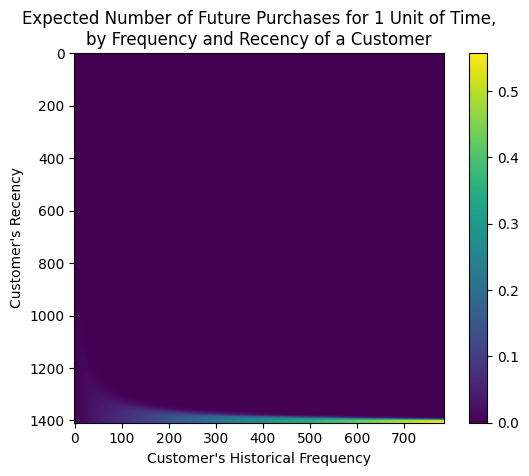

In [ ]:
from lifetimes.plotting import plot_frequency_recency_matrix
plot_frequency_recency_matrix(bgf)

<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

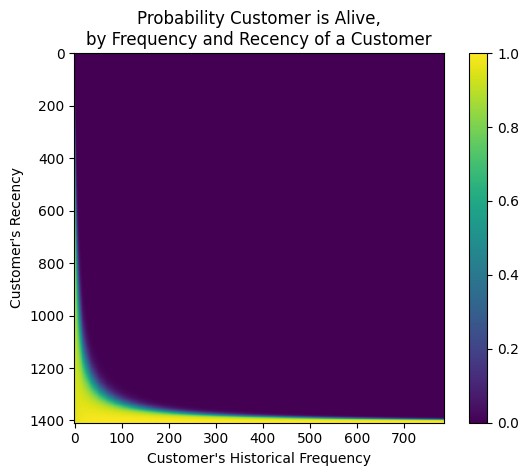

In [ ]:
from lifetimes.plotting import plot_probability_alive_matrix
plot_probability_alive_matrix(bgf)

<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

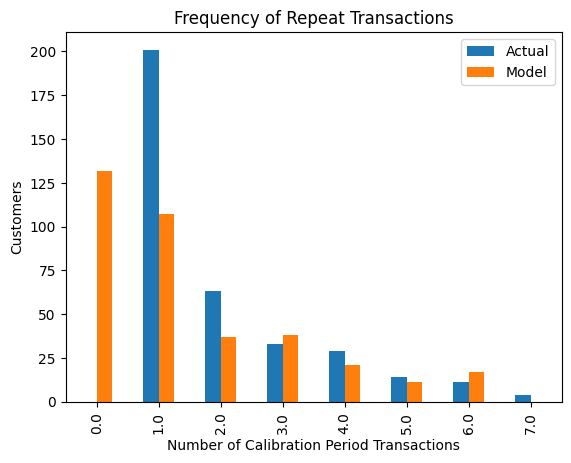

In [ ]:
# Assessing model fit
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

Then we predict the monetary spending of each customers in the next 6 months.
We will use the Gamma-Gamma model using the GammaGammaFitter library.

In [ ]:
# Gamma-Gamma model works if there is a low correlation between F and M
df_customer[["Frequency","Monetary"]].corr()

,Frequency,Monetary
Frequency,1.00,0.28
Monetary,0.28,1.00


In [ ]:
# Train the Gamma-Gamma model
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(df_customer["Frequency"], df_customer["Monetary"])

<lifetimes.GammaGammaFitter: fitted with 585 subjects, p: 2.52, q: 0.12, v: 2.41>

Now we are ready to predict the CLV

In [ ]:
# Predict the monetary for each customer in the next 6 months
df_customer['Monetary_Predicted_6m'] = ggf.customer_lifetime_value(
                                          bgf,
                                          df_customer["Frequency"],
                                          df_customer["Recency"],
                                          df_customer["Tenure"],
                                          df_customer["Monetary"],
                                          time = 6, # time period in months
                                          freq = 'D', # since our Tenure column is in days, we put 'D' here
                                          discount_rate = 0.01)

In [ ]:
df_customer

,CustomerId,Recency,Tenure,Frequency,Monetary,Frequency_Predicted_6m,Monetary_Predicted_6m
0,1,599,1360,181,"788,089.14",0.00,0.00
1,460,1293,1306,3,"84,891.52",0.41,"37,764.42"
2,479,1047,1401,42,"60,043.93",0.00,157.60
3,26,1259,1259,1,"2,500.00",0.15,566.31
4,580,1197,1197,1,"11,016.95",0.16,"2,621.80"
...,...,...,...,...,...,...,...
601,470,148,148,1,"2,250.00",1.23,"4,109.85"
602,590,124,124,1,"1,826.88",1.45,"3,943.04"
603,33,14,14,1,"5,610.03",9.65,"80,715.05"
604,227,47,47,1,296.61,3.51,"1,560.42"


# EDA Chustomer Churn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving churn.csv to churn.csv


In [ ]:
# Membaca dataset menjadi dataframe
df = pd.read_csv('churn.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Get the size of the dataset
df.shape

(10000, 14)

In [ ]:
# Get list of columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Get summary statistics of the dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Count unique values in each column
for col in df.columns:
  print(col, df[col].nunique())

RowNumber 10000
CustomerId 10000
Surname 2932
CreditScore 460
Geography 3
Gender 2
Age 70
Tenure 11
Balance 6382
NumOfProducts 4
HasCrCard 2
IsActiveMember 2
EstimatedSalary 9999
Exited 2


In [ ]:
# Isolate the categorical variables
categorical_variables = [col for col in df.columns if df[col].nunique() <= 11 and col not in "Exited"]
categorical_variables

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [ ]:
# Isolate the numerical variables
numerical_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() > 11
                        and col not in "CustomerId"
                        and col not in "RowNumber"]
numerical_variables

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [ ]:
# Get the count of values of the dependent variable
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
# Customers who left the bank
churn = df.loc[df["Exited"]==1]

# Customers who did not leave the bank
not_churn = df.loc[df["Exited"]==0]

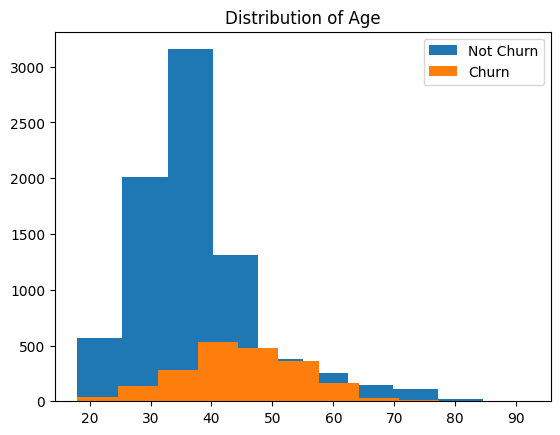

In [ ]:
# Check Age distribution
import matplotlib.pyplot as plt
plt.hist(not_churn["Age"], label="Not Churn")
plt.hist(churn["Age"], label="Churn")
plt.title("Distribution of Age")
plt.legend()
plt.show()

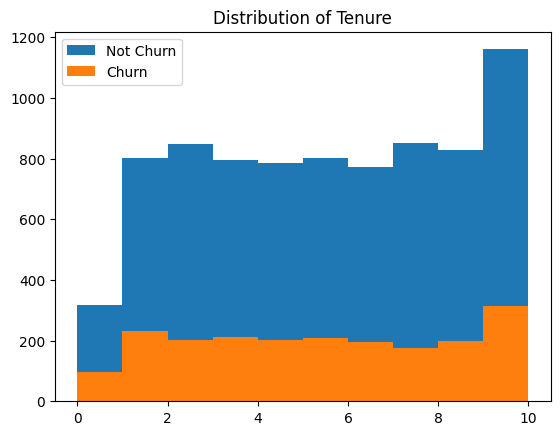

In [ ]:
# Check Tenure distribution
plt.hist(not_churn["Tenure"], label="Not Churn")
plt.hist(churn["Tenure"], label="Churn")
plt.title("Distribution of Tenure")
plt.legend()
plt.show()

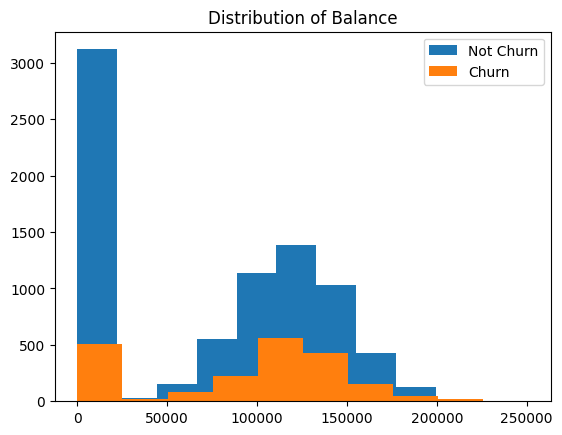

In [ ]:
# Check Balance distribution
plt.hist(not_churn["Balance"], label="Not Churn")
plt.hist(churn["Balance"], label="Churn")
plt.title("Distribution of Balance")
plt.legend()
plt.show()

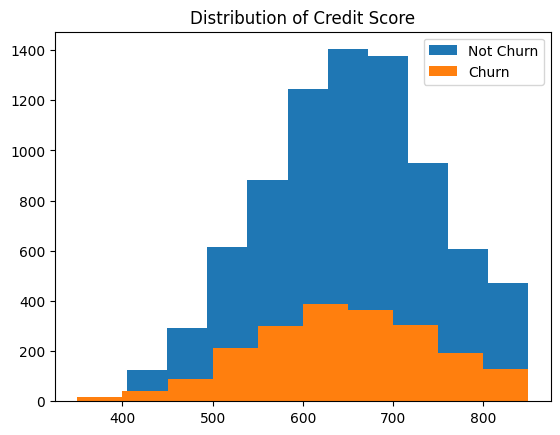

In [ ]:
# Check CreditScore distribution
plt.hist(not_churn["CreditScore"], label="Not Churn")
plt.hist(churn["CreditScore"], label="Churn")
plt.title("Distribution of Credit Score")
plt.legend()
plt.show()

# Data Preprocessing Customer churn

<Axes: >

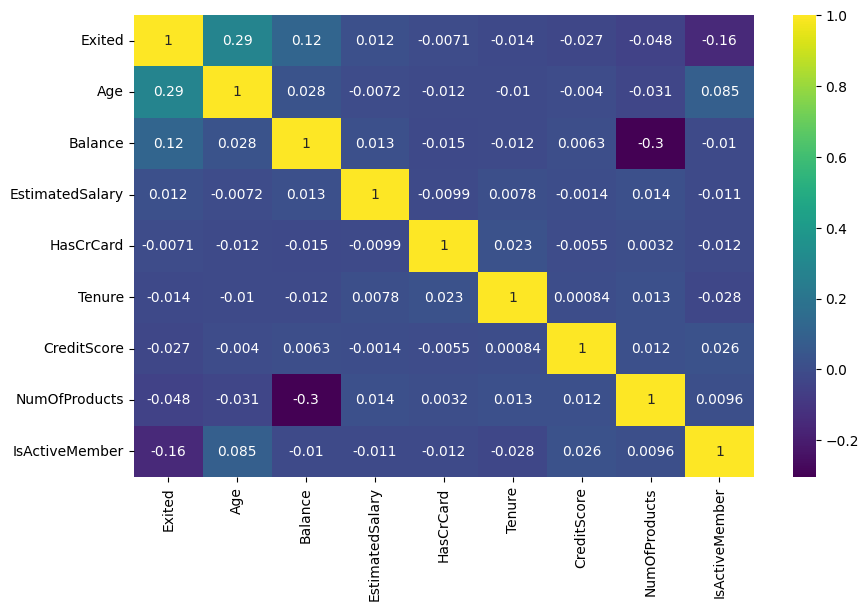

In [ ]:
# Correlation Matrix
import seaborn as sns
import io

k = 10 # number of variables for heatmap
df_corr = df.drop(['RowNumber','CustomerId','Surname','Geography','Gender'], axis=1)
cols = df_corr.corr().nlargest(k, 'Exited')['Exited'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [ ]:
# Check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Drop columns that do not affect the dependent variable
df_prepared = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
df_prepared.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Feathure Engineering

In [ ]:
# Encode categorical variables which type are string
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

## Encode Gender
label_encoder.fit(df_prepared['Gender'])
df_prepared['Gender'] = label_encoder.transform(df_prepared['Gender'])

## Encode Geography
label_encoder.fit(df_prepared['Geography'])
df_prepared['Geography'] = label_encoder.transform(df_prepared['Geography'])

df_prepared.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Scale numerical variables using RobustScaler since it handles outliers better
from sklearn.preprocessing import RobustScaler

mmscaler = RobustScaler()
df_prepared[numerical_variables] = mmscaler.fit_transform(df_prepared[numerical_variables])
df_prepared.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.246269,0,0,0.416667,2,-0.761480,1,1,1,0.011739,1
1,-0.328358,2,0,0.333333,1,-0.104906,1,0,1,0.125512,0
2,-1.119403,0,0,0.416667,8,0.489346,3,1,0,0.139630,1
3,0.350746,0,0,0.166667,1,-0.761480,2,0,0,-0.064717,0
4,1.477612,2,0,0.500000,2,0.221806,1,1,1,-0.214561,0


# Modeling Customer Churn

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split

X = df_prepared.drop("Exited", axis=1)
y = df_prepared["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Logistik Regression

In [ ]:
# Train the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Make a prediction
y_pred = model.predict(X_test)

In [ ]:
# Evaluating the model with Confusion Matrix
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_pred, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  74
True Negative :  1529
False Positive:  332
False Negative:  65


In [ ]:
# Evaluating the model with performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_precision = precision_score(y_test, y_pred)
logreg_recall = recall_score(y_test, y_pred)
logreg_f1 = f1_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (logreg_accuracy * 100.0))
print("Precision: %.2f%%" % (logreg_precision * 100.0))
print("Recall: %.2f%%" % (logreg_recall * 100.0))
print("F1 Score: %.2f%%" % (logreg_f1 * 100.0))

Accuracy: 80.15%
Precision: 53.24%
Recall: 18.23%
F1 Score: 27.16%


## Decision Tree

In [ ]:
# Train the model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make a prediction
y_pred = model.predict(X_test)

In [ ]:
# Evaluating the model with Confusion Matrix

cf = confusion_matrix(y_pred, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  207
True Negative :  1349
False Positive:  199
False Negative:  245


In [ ]:
# Evaluating the model with performance metrics

dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (dt_accuracy * 100.0))
print("Precision: %.2f%%" % (dt_precision * 100.0))
print("Recall: %.2f%%" % (dt_recall * 100.0))
print("F1 Score: %.2f%%" % (dt_f1 * 100.0))

Accuracy: 77.80%
Precision: 45.80%
Recall: 50.99%
F1 Score: 48.25%


## Random Forest

In [ ]:
# Train the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make a prediction
y_pred = model.predict(X_test)

In [ ]:
# Evaluating the model with Confusion Matrix

cf = confusion_matrix(y_pred, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  188
True Negative :  1529
False Positive:  218
False Negative:  65


In [ ]:
# Evaluating the model with performance metrics

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (rf_accuracy * 100.0))
print("Precision: %.2f%%" % (rf_precision * 100.0))
print("Recall: %.2f%%" % (rf_recall * 100.0))
print("F1 Score: %.2f%%" % (rf_f1 * 100.0))

Accuracy: 85.85%
Precision: 74.31%
Recall: 46.31%
F1 Score: 57.06%


# Evaluasi Model Terbaik

In [ ]:
compare = pd.DataFrame(
    [
        ['Logistic Regression', logreg_accuracy, logreg_precision, logreg_recall, logreg_f1],
        ['Decision Tree', dt_accuracy, dt_precision, dt_recall, dt_f1],
        ['Random Forest', rf_accuracy, rf_precision, rf_recall, rf_f1]
    ],
    columns = ['model', 'accuracy', 'precision', 'recall', 'f1_score']
)

compare.style.highlight_max(color="green")

,model,accuracy,precision,recall,f1_score
0,Logistic Regression,0.801500,0.532374,0.182266,0.271560
1,Decision Tree,0.782000,0.790538,0.782000,0.785905
2,Random Forest,0.860000,0.850444,0.860000,0.846394
